<a href="https://colab.research.google.com/github/kelvynlukito/DataScience_ThomsomSampling_ReinforcementLearning/blob/main/DataScience_ThomsomSampling_ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thomson Sampling**

# **Import Libraries**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **Import Dataset**

In [22]:
df = pd.read_csv('/content/Ads_CTR_Optimisation.csv')
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# **Implementing Thomson Sampling**

In [23]:
import random

# N as number of user or audience based on dataset
N = len(df)
# d as number of Ads
d = 10

ads_selected = []
num_reward_1 = [0] * d
num_reward_0 = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(num_reward_1[i] + 1, num_reward_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = df.values[n, ad]
  if reward == 1:
    num_reward_1[ad] = num_reward_1[ad] + 1
  else:
    num_reward_0[ad] = num_reward_0[ad] + 1
  total_reward += reward

# **Visualising Result**

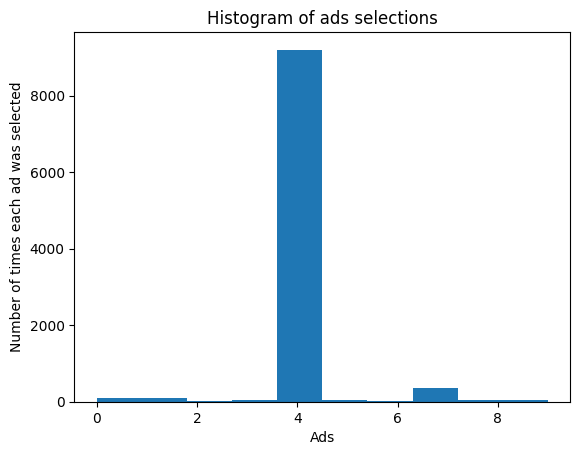

In [24]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()